# Taylor problem 7.42

* Last revised 25-Feb-2019 by Dick Furnstahl (furnstahl.1@osu.edu).

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

In [3]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [4]:
class Oscillator():
    """
    Oscillator class implements the parameters and differential equation for 
     problem 7.42 from Taylor.
     
    Parameters
    ----------
    omega : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    g : float
        acceleration due to gravity 
    R : float
        radius parameter

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    solve_ode(t_pts, theta_0, theta_dot_0)
        Solves the ODE at t_pts given initial conditions.
    small_angle(t, epsilon) 
        Returns the small angle solution.
    """
    def __init__(self, omega=np.sqrt(2.), g=1., R=1.):
        self.omega = omega
        self.g = g
        self.R = R
        self.theta_equil = np.arccos(self.g/(self.omega**2 * self.R))
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dtheta/dt d^2theta/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 2-component vector with y[0] = theta(t) and y[1] = dtheta/dt
            
        Returns
        -------
        
        """
        return [y[1], (self.omega**2 * np.cos(y[0]) - self.g/self.R) \
                       * np.sin(y[0]) ]
    
    
    def solve_ode(self, t_pts, theta_0, theta_dot_0, 
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta_0, theta_dot_0]  
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        theta, theta_dot = solution.y
        return theta, theta_dot
    
    def small_angle(self, t, epsilon_0):
        """Small angle solution"""
        Omega_prime = np.sqrt(self.omega**2 - (self.g/(self.omega*self.R))**2)
        return self.theta_equil + epsilon_0 * np.cos(Omega_prime * t)

In [5]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [6]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [7]:
# oscillator parameters
g = 1.
R = 1.
omega = np.sqrt(2.)

# Plotting time 
t_start = 0.
t_end = 50.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Instantiate a pendulum 
o1 = Oscillator(omega=omega, g=g, R=R) 



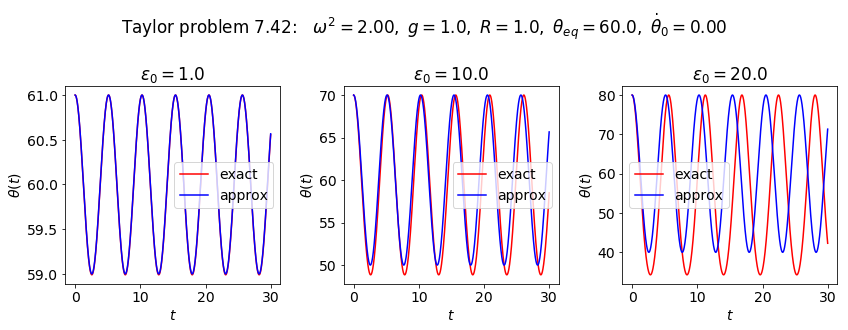

In [8]:
# initial conditions
deg_to_rad = np.pi / 180.
rad_to_deg = 180. / np.pi

theta_dot_0 = 0.0


# start the plot!
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')

fig = plt.figure(figsize=(12,4))
overall_title = 'Taylor problem 7.42:  ' + \
                rf' $\omega^2 = {omega**2:.2f},$' + \
                rf' $g = {g:.1f},$' + \
                rf' $R = {R:.1f},$' + \
                rf' $\theta_{{eq}} = {o1.theta_equil * rad_to_deg:.1f},$' + \
                rf' $\dot\theta_0 = {theta_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# plot 1
epsilon_0 = 1. * deg_to_rad
theta_0 = o1.theta_equil + epsilon_0
theta_dot_0 = 0.0
theta, theta_dot = o1.solve_ode(t_pts, theta_0, theta_dot_0)
theta_approx = o1.small_angle(t_pts, epsilon_0)

ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, 0., 30.)    
plot_y_vs_x(t_pts[start : stop], theta[start : stop] * rad_to_deg, 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label='exact', 
            ax=ax_a)    
plot_y_vs_x(t_pts[start : stop], theta_approx[start : stop] * rad_to_deg, 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label='approx', 
            title=rf'$\epsilon_0={epsilon_0*rad_to_deg:.1f}$', 
            ax=ax_a)    
    
# plot 2  
epsilon_0 = 10. * deg_to_rad
theta_0 = o1.theta_equil + epsilon_0
theta_dot_0 = 0.0
theta, theta_dot = o1.solve_ode(t_pts, theta_0, theta_dot_0)
theta_approx = o1.small_angle(t_pts, epsilon_0)
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, 0., 30.)    
plot_y_vs_x(t_pts[start : stop], theta[start : stop] * rad_to_deg, 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label='exact', 
            ax=ax_b)    
plot_y_vs_x(t_pts[start : stop], theta_approx[start : stop] * rad_to_deg, 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label='approx', 
            title=rf'$\epsilon_0={epsilon_0*rad_to_deg:.1f}$', 
            ax=ax_b)    
    
# plot 3  
epsilon_0 = 20. * deg_to_rad
theta_0 = o1.theta_equil + epsilon_0
theta_dot_0 = 0.0
theta, theta_dot = o1.solve_ode(t_pts, theta_0, theta_dot_0)
theta_approx = o1.small_angle(t_pts, epsilon_0)
ax_b = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, 0., 30.)    
plot_y_vs_x(t_pts[start : stop], theta[start : stop] * rad_to_deg, 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label='exact', 
            ax=ax_b)    
plot_y_vs_x(t_pts[start : stop], theta_approx[start : stop] * rad_to_deg, 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label='approx', 
            title=rf'$\epsilon_0={epsilon_0*rad_to_deg:.1f}$', 
            ax=ax_b)    

fig.tight_layout()
fig.savefig('Taylor_problem_7.42.png', bbox_inches='tight')  